# Tarea 1 

---

**Curso:** Modelamiento Computacional INF-495

**Nombre:** Sebastián Jara C. 

**Email:** jarac.sebastian@gmail.com  

**Rol:** 2704039-k  

---


In [6]:
#Herramientas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Importar Line2D
from sympy import symbols, Eq, solve, latex
from sympy import init_printing
init_printing(use_latex=True)

## <u>Pregunta 1:<u>  
Considere el siguiente sistema dinámico:

\begin{align*}
\dot{x} &= -y -x(x^2 + y^2 - \mu) \,\,\,\,\,\,\,\,\,\,\,\,   (1)\\
\dot{y} &= x -y(x^2 + y^2 - \mu) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (2)
\end{align*}

Encuentre los puntos de equilibrios y estudie su estabilidad como función de $\mu$.

### Respuesta:

Los puntos criticos satisfacen $\dot{x} = 0$ $\wedge$ $\dot{y}=0$. Entonces 

\begin{align}
0 &= -y -x(x^2 + y^2 - \mu) \,\,\,\,\,\,\,\,\,\,\,\,   (3) \\
0 &= x -y(x^2 + y^2 - \mu) \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (4)
\end{align}
Despejando $x$ en la segunda ecuación y reemplazando en la primera, se tiene: 

$$0 = -y -y(x^2 + y^2 - \mu)^2 \,\,\, \Longrightarrow \,\,\,  0 = y(1+(x^2 + y^2 - \mu)^2)$$

Lo último implica que $y=0$. Reemplazando $y=0$ en (3) se tiene:

$$0 = -x(x^2 - \mu).$$

Por lo tanto, los candidatos a puntos críticos del sistema son $P_1 = (0,0)$, $P_2 = (\sqrt{\mu}, 0)$ y $P_3 = (-\sqrt{\mu}, 0)$. Sin embargo, $P_2$ y $P_3$ no satisfacen (2). Finalmente, $P_1$ es el único punto crítico. 
<br>
<br>
Lo anterior puede realizarse usando SymPy. A continuación se muestra el código. 

In [11]:
# Define las variables simbólicas
x, y, l = symbols('x y l')

# Define las ecuaciones
ecuacion1 = Eq( -y - x*(x**2 + y**2 - l), 0)
ecuacion2 = Eq( x - y*(x**2 + y**2 - l), 0)

# Resuelve el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (x, y))

# Imprime las soluciones en formato LaTeX
solucion

## Cálculo y clasificación de Puntos Críticos o Soluciones de Equilibrio

Para clasificar los puntos críticos o soluciones de equilibrio se realiza lo siguiente: Notar que el lado derecho de (1)-(2) define la función $f:\mathbb{R}^2 \longrightarrow \mathbb{R}^2$, con $f(x,y) = (-y -x(x^2 + y^2 - \mu),  x -y(x^2 + y^2 - \mu) )$. La matriz Jacobiana asociada a $f$ es:

$$Df(x,y) = \left[
\begin{array}{cc}
-3x^2 - y^2 + \mu & -1 - 2xy \\
1-2xy & -x^2 - 3y^2 +\mu  \\
\end{array}
\right]$$

A continuación, elegimos una solución de (1)-(2) cercana a $P_1$, de la forma $(x(t),y(t)) = (0,0) + (v(t),w(t))$. Reemplazando en el sistema y linealizando se tiene que 

$$\dfrac{d}{dt}[(0,0) + (v(t),w(t))] = f(0 + v(t), 0 + w(t)) \approx f(0,0) + (v(t),w(t)) \,\,Df(0,0)^{T}  $$

Lo anterior implica que las funciones $(v(t),w(t))$ satisfacen 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
\mu & -1 \\
1 & -\mu  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,   (5)$$

La estabilidad de la solución de equilibrio puede analizarse a través de los valores propios que define la matriz de (5). El polinomio característico viene dado por 
$$p(\lambda)= (\mu - \lambda)^2 + 1$$

Entonces, los valores propios de la matriz dada en (5) son $\lambda_1 = \mu + i$ y $\lambda_2 = \mu - i$. Por lo tanto, si $\mu \leq 0$ la solución de equilibrio resulta estable (en el caso $\mu < 0$ es asintóticamente estable). En caso contrario, la solución de equilibrio es inestable.

<br> 
<br> 



## Curvas solución y campo de pendientes para el caso linearizado con $\mu = -2$

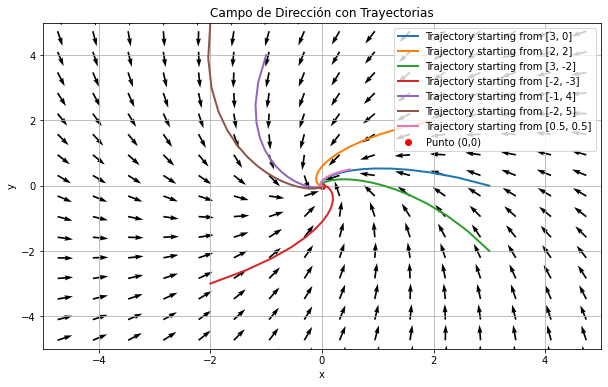

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 2
b = 2 

# Sistema de ecuaciones diferenciales
def system(t, Y):
    x, y = Y
    dxdt = -2*x - y
    dydt = x - 2*y
    return [dxdt, dydt]

# Campo de dirección
x = np.linspace(-6, 6, 20)
y = np.linspace(-6, 6, 20)

X, Y = np.meshgrid(x, y)
U = -2*X - Y
V = X - 2*Y

# Normalizar flechas
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

plt.figure(figsize=(10, 6))

plt.quiver(X, Y, U, V)

# Lista de condiciones iniciales
initial_conditions_list = [[3, 0], [2, 2], [3, -2], [-2, -3], [-1, 4], [-2,5], [1/2, 1/2]]

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, [0, 10], init_cond, t_eval=np.linspace(0, 10, 100))
    plt.plot(sol.y[0], sol.y[1], label=f'Trajectory starting from {init_cond}', lw=2)

# Puntos de equilibrio
plt.scatter(0, 0, color='red', marker='o', label='Punto (0,0)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Dirección con Trayectorias')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid(True)
plt.legend()

plt.show()



## Plano de fase para los caso $\mu = -2$, $\mu = 0$ y $\mu = 2$, sistema linearizado.


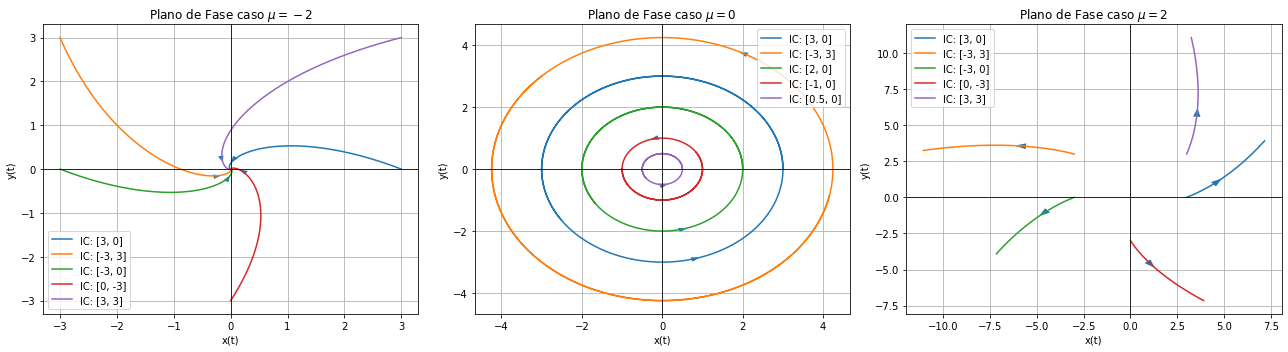

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir el sistema de EDOs
def system(t, Y):
    x, y = Y
    dxdt = -2*x - y
    dydt = x - 2*y
    return [dxdt, dydt]

def system_2(t, Y):
    x, y = Y
    dxdt = 0*x - y
    dydt = x  + 0*y
    return [dxdt, dydt]

def system_3(t, Y):
    x, y = Y
    dxdt = 2*x - y
    dydt = x  +2*y
    return [dxdt, dydt]

initial_conditions_list = [[3, 0], [-3, 3], [-3, 0], [0, -3], [3, 3]]
t = np.linspace(0, 3, 500)

initial_conditions_list_2 = [[3, 0], [-3, 3], [2, 0], [-1, 0], [1/2, 0]]
t_2 = np.linspace(0, 10, 500)

initial_conditions_list_3 = [[3, 0], [-3, 3], [-3, 0], [0, -3], [3, 3]]
t_3 = np.linspace(0, 0.5, 500)

plt.figure(figsize=(18, 5))

# Sistema 1
plt.subplot(1, 3, 1)

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, [t[0], t[-1]], init_cond, t_eval=t)
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {init_cond}')
    mid_idx = len(t) // 2
    plt.arrow(sol.y[0][mid_idx], sol.y[1][mid_idx],
              sol.y[0][mid_idx + 1] - sol.y[0][mid_idx],
              sol.y[1][mid_idx + 1] - sol.y[1][mid_idx],
              shape='full', lw=0, length_includes_head=True, head_width=.1)
    
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Plano de Fase caso $\mu = -2$')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')

# Sistema 2
plt.subplot(1, 3, 2)
for init_cond in initial_conditions_list_2:
    sol = solve_ivp(system_2, [t_2[0], t_2[-1]], init_cond, t_eval=t_2)
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {init_cond}')
    mid_idx = len(t_2) // 2
    plt.arrow(sol.y[0][mid_idx], sol.y[1][mid_idx],
              sol.y[0][mid_idx + 1] - sol.y[0][mid_idx],
              sol.y[1][mid_idx + 1] - sol.y[1][mid_idx],
              shape='full', lw=0, length_includes_head=True, head_width=.15)

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Plano de Fase caso $\mu = 0$')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()



# Sistema 3
plt.subplot(1, 3, 3)
for init_cond in initial_conditions_list_3:
    sol = solve_ivp(system_3, [t_3[0], t_3[-1]], init_cond, t_eval=t_3)
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {init_cond}')
    mid_idx = len(t_3) // 2
    dx = (sol.y[0][mid_idx + 1] - sol.y[0][mid_idx]) * 10
    dy = (sol.y[1][mid_idx + 1] - sol.y[1][mid_idx]) * 10
    plt.arrow(sol.y[0][mid_idx], sol.y[1][mid_idx], dx, dy,
              shape='full', lw=0, length_includes_head=True, head_width=.4)
    
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Plano de Fase caso $\mu = 2$')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')

plt.tight_layout()
plt.show()



## Plano de fase para el sistema no linealizado
Para el caso $\mu=0$ dibujamos distintas trayectorias de soluciones del sistema (1)-(2). Existen dos situaciones en que el comportamiento a largo plazo de las soluciones cerca de un punto de equilibrio del sistema no lineal y su linearización pueden diferir: una es cuando el sistema linearizado es un centro (valores propios complejos con parte real cero) y el otro caso es cuando el sistema linearizado tiene cero como valor propios [1, pag.416]. Por lo tanto, resulta necesario analizar este punto critico considerando el sistema no linearizado.

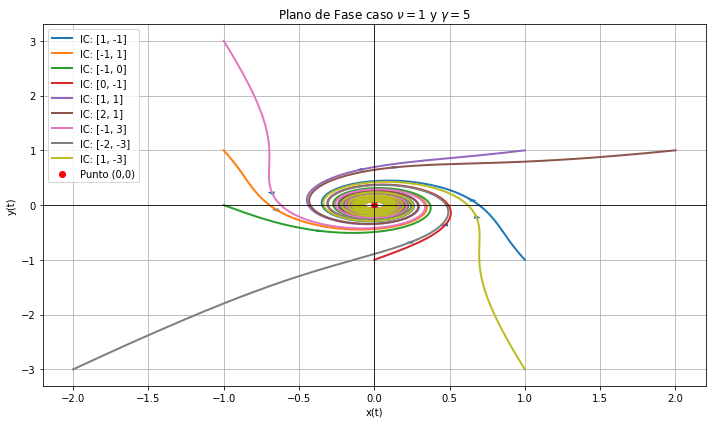

In [61]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir el sistema de EDOs
def system(t, Y):
    x, y = Y
    dxdt = -y - x*(x**2 + y**2)
    dydt = x - y*(x**2 + y**2)
    return [dxdt, dydt]

# Lista de condiciones iniciales
initial_conditions_list = [[1, -1], [-1 , 1], [-1, 0], [0 , -1], [1 , 1], [2, 1], [-1, 3], [-2, -3], [1,-3]]
t = np.linspace(0, 100, 50000)  # Tiempos en los que queremos la solución

plt.figure(figsize=(10, 6))

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, [t[0], t[-1]], init_cond, t_eval=t)
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {init_cond}',lw=2)
    
    # Agregando flechas
    mid_idx = len(t) // 100  
    dx = (sol.y[0][mid_idx + 1] - sol.y[0][mid_idx])
    dy = (sol.y[1][mid_idx + 1] - sol.y[1][mid_idx])
    plt.arrow(sol.y[0][mid_idx], sol.y[1][mid_idx], dx, dy,
              shape='full', lw=0, length_includes_head=True, head_width=.05)

plt.scatter(0, 0, color='red', marker='o', label='Punto (0,0)')

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(r'Plano de Fase caso $\nu=1$ y $\gamma = 5$')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


**Observación:** En este caso, las soluciones se mueven lentamente en espiral hacia el punto de equilibrio $(0,0)$. El comportamiento anterior no fue evidente cuando se analizo a partir del sistema linearizado.

Para complementar el análisis anterior, el siguiente código muestra una solución para el presente caso. La con condición inicial elegida es $x(0)=1$ $\wedge$ $y(0)=  1.5$. Se presenta la solución $x(t)$ e $y(t)$ en plano $x,y$, y su respectiva trayectoria en el plano de fase.

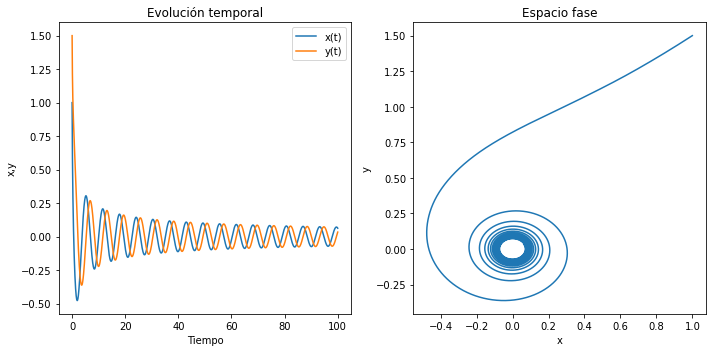

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición del sistema de ecuaciones

# Sistema de ecuaciones diferenciales
def system(t, Y):
    x, y = Y
    dxdt = -y - x*(x**2 + y**2)
    dydt = x - y*(x**2 + y**2)
    return [dxdt, dydt]

# Parámetros

# Intervalo de tiempo
t = np.linspace(0, 100, 50000)
# Condiciones iniciales: 40 presas y 9 depredadores
init_cond = [1, 1.5]

# Solución del sistema
solution = solve_ivp(system, [t[0], t[-1]], init_cond, t_eval=t)

# Gráficos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[0], label="x(t)")
plt.plot(solution.t, solution.y[1], label="y(t)")
plt.xlabel("Tiempo")
plt.ylabel("x,y")
plt.legend()
plt.title("Evolución temporal")

plt.subplot(1, 2, 2)
plt.plot(solution.y[0], solution.y[1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Espacio fase")

plt.tight_layout()
plt.show()



## <u>Pregunta 2:<u>  
Considere el siguiente sistema dinámico:

\begin{align*}
\dot{x} &= \gamma - y^2 - \nu \, x \,\,\,\,\,\,\,\,\,\,\,\,   (6)\\
\dot{y} &= -\nu \, y +xy \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (7)
\end{align*}

donde $\gamma$ y $\nu$ son constantes positivas. Encuentre los puntos críticos y estudie su estabilidad.

### Respuesta:

Los puntos criticos satisfacen $\dot{x} = 0$ $\wedge$ $\dot{y}=0$. Entonces 

\begin{align}
0 &=  \gamma - y^2 - \nu \, x \,\,\,\,\,\,\,\,\,\,\,\,   (8) \\
0 &= -\nu \, y +xy \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (9)
\end{align}

Factorizando por $y$ en la segunda ecuación se tiene $0 = y(-\nu  +x)$. De lo anterior se desprenden dos casos: $y=0$ o $x = \nu$. Para el primer caso, reemplazando $y=0$ en (8) se deduce que $x=\dfrac{\gamma}{\nu}$. Por lo tanto, $P_1 = \left(\dfrac{\gamma}{\nu}, 0 \right)$ es una primera solución de equilibrio.

Para el segundo caso, reemplazando $x=\nu$ en (8) se deduce que:

$$0 =  \gamma - y^2 - \nu \, \nu \,\,\, \Longrightarrow \,\,\, y^2 = \gamma - \nu^2  \,\,\, \Longrightarrow \,\,\, y = \pm \sqrt{\gamma - \nu^2},  $$

siempre que $\gamma  \geq \nu^2$. Por lo tanto, $P_2 = (\nu ,  \sqrt{\gamma - \nu^2}) $ y $P_3 = (\nu ,  -\sqrt{\gamma - \nu^2}) $ son soluciones de equilibrio.
<br>
<br>
Lo anterior puede realizarse usando SymPy. A continuación se muestra el código. 

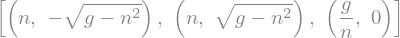

In [19]:
# Define las variables simbólicas 
x, y, g, n = symbols('x y g n')  # "g" es gamma y "n" es nu

# Define las ecuaciones
ecuacion1 = Eq( g - y**2 - n*x , 0)
ecuacion2 = Eq( -n*y + x*y , 0)

# Resuelve el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (x, y))

# Imprime las soluciones en formato LaTeX
solucion

## Cálculo y clasificación de Puntos Críticos o Soluciones de Equilibrio


Por otro lado, la parte derecha de (6)-(7) define la función $f:\mathbb{R}^2 \longrightarrow \mathbb{R}^2$, con $f(x,y) = (\gamma - y^2 - \nu \, x , -\nu \, y +xy  )$. Note que:

$$Df(x,y) = \left[
\begin{array}{cc}
-\nu & -2y \\
y & -\nu + x   \\
\end{array}
\right]  \,\,\,\,\,\,\,\,\,\,\,\,   (10)$$

La expresión (10) es útil para estudiar el comportamiento de las soluciones del sistema (6)-(7) cerca de cada solución de equilibrio. 


<br> 
<br> 


**Caso 1 $\gamma  < \nu^2$:** En este caso solo $P_1$ es una solución de equilibrio. A continuación, elegimos una solución de (6)-(7) cercana a $P_1$, de la forma $(x(t),y(t)) = \left(\dfrac{\gamma}{\nu}, 0 \right) + (v(t),w(t))$. Reemplazando en el sistema (6)-(7) y linealizando se tiene que 

$$\dfrac{d}{dt}\left[ \left(\dfrac{\gamma}{\nu}, 0 \right) + (v(t),w(t))\right] = f\left(\dfrac{\gamma}{\nu} + v(t), 0 + w(t)\right) \approx f\left(\dfrac{\gamma}{\nu},0\right) + (v(t),w(t)) \,\, Df\left(\dfrac{\gamma}{\nu},0\right)^{T}.$$

Lo anterior implica que las funciones $(v(t),w(t))$ satisfacen: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
-\nu & 0 \\
0 & \dfrac{-\nu^2 + \gamma}{\nu}  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,   (11)$$

La matriz asociada al sistema (11) ya diagonal, entonces los valores propios de la matriz dada en (11) son $\lambda_1 = -\nu$ y $\lambda_2 = \dfrac{-\nu^2 + \gamma}{\nu}$. Como $\gamma  < \nu^2$ y $\gamma$ con $\nu$ son constantes positivas, se deduce que $\lambda_1 <0$ y $\lambda_2 <0$. Por lo tanto, $P_1$ es una solución de equilibrio estable. 

**Observación:** El siguiente bloque de código muestra el plano de fase para el caso $\nu = 3$ y $\gamma = 3$. Note que en este caso $P_1 = (1,0)$.



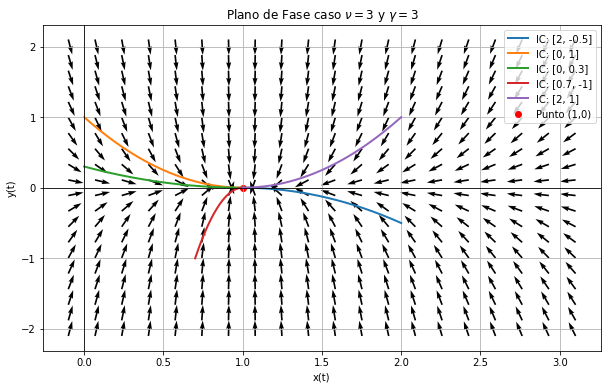

In [63]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir el sistema de EDOs
def system(t, Y):
    x, y = Y
    dxdt = -3*x 
    dydt = -6*y
    return [dxdt, dydt]

# Campo de dirección
x = np.linspace(-1.1, 2.1, 20)
y = np.linspace(-2.1, 2.1, 20)

X, Y = np.meshgrid(x, y)
U = -3*X 
V = -6*Y

# Normalizar flechas
N = np.sqrt(U**2 + V**2)
U = (U/N) 
V = V/N

# Lista de condiciones iniciales
initial_conditions_list = [[1, -0.5], [-1 , 1], [-1, 0.3], [-0.3 , -1], [1 , 1]]
t_span = (0, 3)
t = np.linspace(0, 3, 500)  # Tiempos en los que queremos la solución

plt.figure(figsize=(10, 6))

plt.quiver(X + 1 , Y, U, V)

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, t_span, init_cond, t_eval=t)
    plt.plot(sol.y[0] + 1   , sol.y[1], label=f'IC: {[init_cond[0]+1, init_cond[1]+0]}',lw=2)
    

plt.scatter(1, 0, color='red', marker='o', label='Punto (1,0)')
    
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(r'Plano de Fase caso $\nu=3$ y $\gamma = 3$')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')

plt.show()


**Caso 2 $\gamma  \geq \nu^2$:** En este caso solo $P_1, P_2, P_3$ son soluciones de equilibrio. De lo hecho anteriormente, para $P_1$ la matriz queda exactamente igual a (11). Sin embargo, en este caso un valor propio es negativo y el otro valor propio queda mayor o igual a cero. Por lo tanto $P_1$ es un punto silla. 



A continuación, elegimos una solución de (6)-(7) cercana a $P_2=(\nu ,  \sqrt{\gamma - \nu^2})$, de la forma $(x(t),y(t)) = (\nu ,  \sqrt{\gamma - \nu^2}) + (v(t),w(t))$. Reemplazando en el sistema (6)-(7) y linealizando $f$ se tiene que
<br>

$$\dfrac{d}{dt}\left[ \left(\nu ,  \sqrt{\gamma - \nu^2}\right) + (v(t),w(t))\right] = f\left(\nu + v(t), \sqrt{\gamma - \nu^2} + w(t)\right) \approx f\left(\nu,\sqrt{\gamma - \nu^2}\right) + (v(t),w(t)) \,\, Df\left(\nu ,  \sqrt{\gamma - \nu^2}\right)^{T}.$$

Lo anterior implica que las funciones $(v(t),w(t))$ satisfacen: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
-\nu & -2\sqrt{\gamma - \nu^2} \\
\sqrt{\gamma - \nu^2} & 0  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (12)
$$


La estabilidad de la solución de equilibrio $P_2$ puede analizarse a través de los valores propios que define la matriz de (12). El polinomio característico viene dado por 
$$p(\lambda)= -\lambda(-\nu - \lambda) + 2 \left(\sqrt{\gamma - \nu^2} \right)^2 = \lambda^2 + \nu \, \lambda + 2\, (\gamma - \nu^2) = \left(\lambda + \dfrac{\nu}{2} \right)^2 - \left[ \dfrac{8(\nu^2 - \gamma) + \nu^2}{4} \right]. \,\,\,\,\,\,\,\,\,\,\,\,   (13)$$

Note que, si $8(\nu^2 - \gamma) + \nu^2 < 0$, entonces los valores propios de la matriz dada en (12) son números complejos con parte real igual a $-\dfrac{\nu}{2}$. Como $\nu$ es una cantidad positiva, se deduce que la solución de equilibrio $P_2$ resulta estable. 

En el caso en que $8(\nu^2 - \gamma) + \nu^2 \geq 0$, entonces ambos valores propios de la matriz dada en (12) son números reales: $\lambda_1 = \dfrac{-\nu + \sqrt{9\nu^2-8\gamma}}{2}$ y $\lambda_2 = \dfrac{-\nu - \sqrt{9\nu^2-8\gamma}}{2}$. No es difícil notar que $\lambda_2<0$ y que 

$$\lambda_1 = \dfrac{-\nu + \sqrt{9\nu^2-8\gamma}}{2} \leq  \dfrac{-\nu + \sqrt{8(\nu^2-\gamma) + \nu^2}}{2} \leq  \dfrac{-\nu + \sqrt{\nu^2}}{2} \leq  0,$$

ya que $\nu^2-\gamma \leq 0$. Por lo tanto, en este caso, también resulta que la solución $P_2$ es una solución de equilibrio estable. 


El siguiente bloque de código muestra el plano de fase para el caso $\nu = 1$ y $\gamma = 5$. En este caso, las soluciones pasan cerca de $P_2 = (1,2)$.



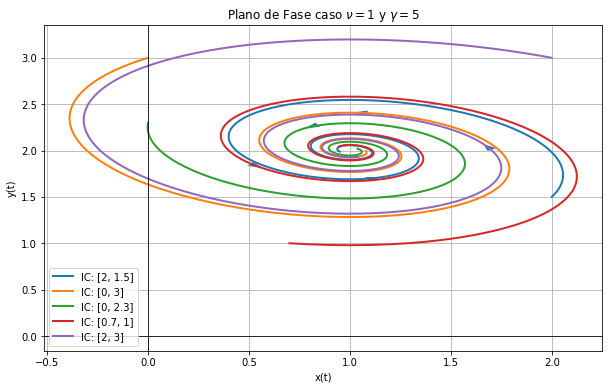

In [64]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir el sistema de EDOs
def system(Y, t=0):
    x, y = Y
    dxdt = -x - 4*y 
    dydt = 2*x 
    return [dxdt, dydt]

# Lista de condiciones iniciales
initial_conditions_list = [[1, -0.5], [-1 , 1], [-1, 0.3], [-0.3 , -1], [1 , 1]]
t = np.linspace(0,6, 500)  # Tiempos en los que queremos la solución

plt.figure(figsize=(10, 6))

for init_cond in initial_conditions_list:
    sol = odeint(system, init_cond, t)
    plt.plot(sol[:, 0] + 1, sol[:, 1] + 2, label=f'IC: {[init_cond[0]+1,init_cond[1]+2]}', lw=2)
    
    # Agregando flechas
    mid_idx = len(t) // 3  # índice del punto medio de 't'
    dx = (sol[mid_idx + 1, 0] - sol[mid_idx, 0]) 
    dy = (sol[mid_idx + 1, 1] - sol[mid_idx, 1])
    plt.arrow(sol[mid_idx, 0] + 1, sol[mid_idx, 1] + 2, dx, dy,
              shape='full', lw=0, length_includes_head=True, head_width=.05)

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(r'Plano de Fase caso $\nu=1$ y $\gamma = 5$')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')

plt.show()

Finalmente, si elegimos una solución de (6)-(7) cercana a $P_3=(\nu ,  -\sqrt{\gamma - \nu^2})$, de la forma $ (x(t),y(t)) = (\nu ,  -\sqrt{\gamma - \nu^2}) + (v(t),w(t))$. Reemplazando en el sistema (6)-(7) y linealizando se tiene que 

$$\dfrac{d}{dt}\left[ \left(\nu ,  -\sqrt{\gamma - \nu^2}\right) + (v(t),w(t))\right] = f\left(\nu + v(t), -\sqrt{\gamma - \nu^2} + w(t)\right) \approx f\left(\nu,-\sqrt{\gamma - \nu^2}\right) + (v(t),w(t)) \,\, Df\left(\nu ,  -\sqrt{\gamma - \nu^2}\right)^{T}.$$

Lo anterior implica que las funciones $(v(t),w(t))$ satisfacen: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
-\nu & 2\sqrt{\gamma - \nu^2} \\
-\sqrt{\gamma - \nu^2} & 0  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,   (14)$$

El polinomio característico asociado a (14) queda exatamente igual a (13). Por lo tanto, se sigue el mismo análisis hecho anteriormente para concluir que $P_2$ es una solución de equilibrio análoga a $P_3$.

En conclusión, si  $\gamma  \geq \nu^2$, entonces $P_1$ es silla y $P_2$ con $P_3$ son puntos estables. 



## Plano de fase para el sistema no linealizado
Para el caso $\nu=1$ y $\gamma = 5$ las soluciones de equilibrio son $(1,2)$, $(1,-2)$ y $(5,0)$. El siguiente bloque de código usa el sistema no linealizado y describe un par de trayectorias solución para el sistema (6)-(7).

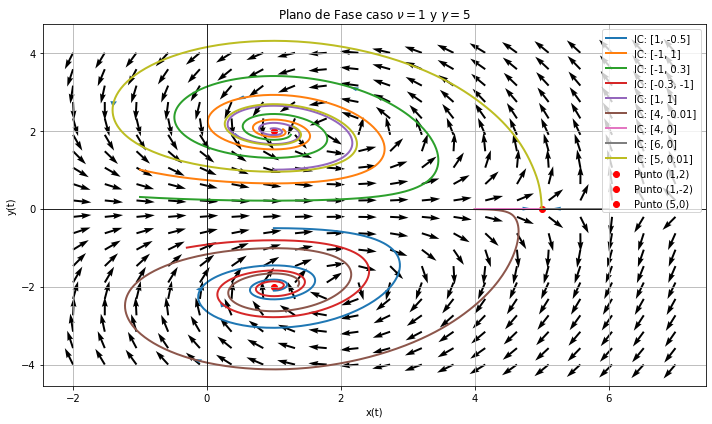

In [65]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir el sistema de EDOs para solve_ivp
def system(t, Y):
    x, y = Y
    dxdt = 5 - y**2 - x
    dydt = -y + x*y
    return [dxdt, dydt]

# Campo de dirección
x = np.linspace(-3, 6, 20)
y = np.linspace(-4, 4, 20)

X, Y = np.meshgrid(x, y)
U = 5 - Y**2 - X
V = -Y + X*Y

# Normalizar flechas
N = np.sqrt(U**2 + V**2)
U = U/N 
V = V/N



# Lista de condiciones iniciales
initial_conditions_list = [[1, -0.5], [-1 , 1], [-1, 0.3], [-0.3 , -1], [1 , 1], [4, -0.01], [4, 0], [6, 0], [5, 0.01]]
t_span = (0, 6)
t_eval = np.linspace(*t_span, 500)  # Tiempos en los que queremos la solución

plt.figure(figsize=(10, 6))


plt.quiver(X + 1 , Y, U, V)

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, t_span, init_cond, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {init_cond}', lw=2)
    
    # Agregando flechas
    mid_idx = len(t_eval) // 3  # índice del punto a un tercio de 't_eval'
    dx = (sol.y[0, mid_idx + 1] - sol.y[0, mid_idx])
    dy = (sol.y[1, mid_idx + 1] - sol.y[1, mid_idx])
    plt.arrow(sol.y[0, mid_idx], sol.y[1, mid_idx], dx, dy,
              shape='full', lw=0, length_includes_head=True, head_width=.1)

plt.scatter(1, 2, color='red', marker='o', label='Punto (1,2)')
plt.scatter(1, -2, color='red', marker='o', label='Punto (1,-2)')
plt.scatter(5, 0, color='red', marker='o', label='Punto (5,0)')

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(r'Plano de Fase caso $\nu=1$ y $\gamma = 5$')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


En el plano de fase anterior se observa que los punto $(1,2)$ y $(1,-2)$ son asintóticamente estables. Por otro lado, el punto $(5,0)$ corresponde a un punto silla. 

## <u>Pregunta 3:<u>  
Considere dos espcies compitiendo donde una de las especies inmigra o emigra a una tasa constante $h$. Las poblaciones son gobernadas por:

\begin{align*}
\dot{x} &= x\,(1-a\,x) - xy \,\,\,\,\,\,\,\,\,\,\,\,   (15)\\
\dot{y} &= y\, (b-y) - xy + h  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (16)
\end{align*}

donde $a$ y $b$ son constantes positivas. Analice la dinámica para los casos $h=0$, $h<0$ y $h>0$. En particular, en cada caso indique el comportamiento del sistema en el espacio de parámetros $(a,b)$.

## Respuesta:

Analizaremos cada caso por separado.

### Caso 1 h=0:

Los puntos criticos satisfacen $\dot{x} = 0$ $\wedge$ $\dot{y}=0$. Entonces 

\begin{align}
0 &=   x\,(1-a\,x) - xy  \,\,\,\,\,\,\,\,\,\,\,\,   (17) \\
0 &= y\, (b-y) - xy \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (18)
\end{align}


Resolviendo el sistema (17)-(18) se obtienen cuatro puntos críticos: $P_1 = (0,0)$, $P_2 = (0,b)$, $P_3=\left(\dfrac{1}{a}, 0\right)$ y $P_4 = \left( \dfrac{1-b}{a-1}, \dfrac{ab-1}{a-1}\right)$.

Lo anterior puede realizarse usando SymPy. A continuación se muestra el código. 

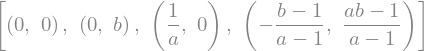

In [66]:
# Define las variables simbólicas
x, y, a, b = symbols('x y a b')

# Define las ecuaciones
ecuacion1 = Eq( x*(1-a*x) - x*y, 0)
ecuacion2 = Eq( y*(b-y) - x*y, 0)

# Resuelve el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (x, y))

# Imprime las soluciones en formato LaTeX
solucion

## Cálculo y clasificación de Puntos Críticos o Soluciones de Equilibrio

La parte derecha de (15)-(16) define la función $f:\mathbb{R}^2 \longrightarrow \mathbb{R}^2$, con $f(x,y) = (x\,(1-a\,x) - xy , y\, (b-y) - xy  )$. Note que:

$$Df(x,y) = \left[
\begin{array}{cc}
1-2\,a\,x - y & -x \\
-y & b - 2\, y - x  \\
\end{array}
\right]  \,\,\,\,\,\,\,\,\,\,\,\,   (19)$$

La expresión (19) es útil para estudiar el comportamiento de las soluciones del sistema (15)-(16) cerca de cada solución de equilibrio. 


<br> 
A continuación, se elige una solución de la forma $(x(t)+y(t)) = P_i + (v(t), w(t))$, cercana al punto de equilibrio $P_i$ para clasificar el punto, como se hizo anteriormente. En general, reemplazando $(x(t)+y(t)) = P_i + (v(t), w(t))$ en el sistema (15)-(16) y linealizando se tiene que:

<br>

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
1-2\,a\,x_i - y_i & -x_i \\
-y_i & b - 2\, y_i - x_i  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (20)
$$

<br>

con $P_i = (x_i, y_i)$. En primer lugar, reemplazando $P_1$ en (20) se obtiene el sistema lineal: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
1 & 0 \\
0 & b  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (21)
$$

Como $b$ es positivo, se deduce que el sistema en este caso es inestable para todo $a>0$ y $b>0$. 

En segundo lugar, reemplazando $P_2$ en (20) se obtiene el sistema lineal: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
1-b & 0 \\
-b & -b  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (22)
$$

Como $b$ es positivo, se deduce que el punto crítico $P_2$ es estable si $b>1$, el punto crítico $P_2$ es silla si $0<b<1$ y el punto $P_2$ es degenerado si $b=1$.

En tercer lugar, reemplazando $P_3$ en (20) se obtiene el sistema lineal: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
-1 & -\dfrac{1}{a} \\
0 & \dfrac{ab-1}{a}  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (23)
$$

De (23) se deduce que el punto crítico $P_3$ es estable si $ab<1$, el punto crítico $P_3$ es silla si $ab>1$ y el punto $P_3$ es degenerado si $ab=1$.


En cuarto lugar, reemplazando $P_4$ en (20) se obtiene el sistema lineal: 

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \dfrac{1}{a-1}\left[
\begin{array}{cc}
a(b-1) & b-1 \\
1-ab & 1-ab  \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (24)
$$

Los valores propios de la matriz que define (24) vienen dados por:

$$\lambda_1 = \frac{1}{2} \left( -\sqrt{4 a^2 b^2 - 4 a^2 b + a^2 - 4 a b^2 + 2 a + 4 b - 3} - a + 1 \right)$$
$$\lambda_2 = \frac{1}{2} \left( \sqrt{4 a^2 b^2 - 4 a^2 b + a^2 - 4 a b^2 + 2 a + 4 b - 3} - a + 1 \right)
$$

<br>

El siguien bloque intenta determinar el signo que toma la expresión $4 a^2 b^2 - 4 a^2 b + a^2 - 4 a b^2 + 2 a + 4 b - 3$.

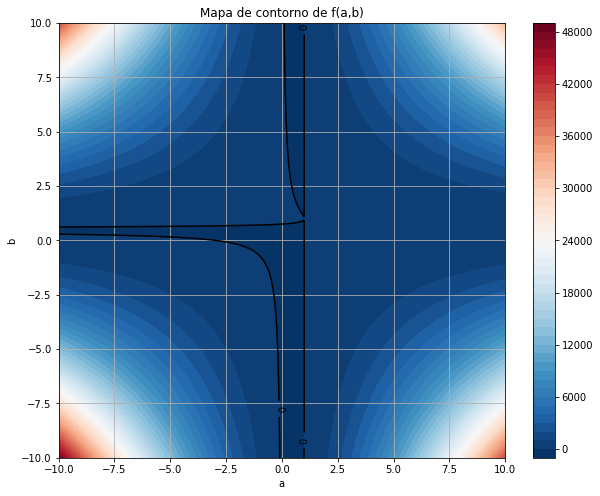

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función
def f(a, b):
    return 4*a**2*b**2 - 4*a**2*b + a**2 - 4*a*b**2 + 2*a + 4*b - 3

# Crea una malla de valores para a y b
a = np.linspace(-10, 10, 400)
b = np.linspace(-10, 10, 400)
A, B = np.meshgrid(a, b)
Z = f(A, B)

# Crea el mapa de contorno
plt.figure(figsize=(10, 8))
contour = plt.contour(A, B, Z, levels=[0], colors='black')  # Contorno para f(a,b) = 0
plt.clabel(contour, inline=1, fontsize=10)
contour_filled = plt.contourf(A, B, Z, 50, cmap="RdBu_r")
plt.colorbar(contour_filled)
plt.title("Mapa de contorno de f(a,b)")
plt.xlabel("a")
plt.ylabel("b")
plt.grid(True)
plt.show()


**Observación:** El gráfico anterior evidencia que la expresión $4 a^2 b^2 - 4 a^2 b + a^2 - 4 a b^2 + 2 a + 4 b - 3$ no se torna negativa para ningún valor de $a,b$. 


Por lo tanto, $\lambda_1$ y $\lambda_2$ son valores propios reales. Además $\lambda_1 <0$ y $\lambda_2>0$. Por lo tanto, en este caso $P_4$ es un punto silla.



### Plano de fase para el sistema no linealizado
Para el caso $a=2$ y $b = 2$ las soluciones de equilibrio son $P_1 = (1,2)$, $P_2 = (0,2)$, $P_3 = (1/2, 0)$ y $P_4 = (-1,3)$.

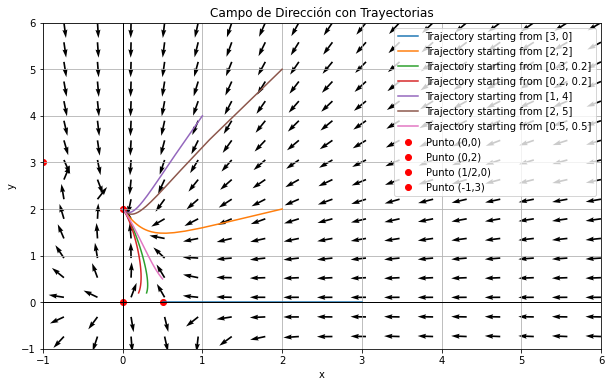

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 2
b = 2 

# Sistema de ecuaciones diferenciales
def system(t, Y):
    x, y = Y
    dxdt = x*(1-a*x) - x*y
    dydt = y*(b-y) - x*y
    return [dxdt, dydt]

# Campo de dirección
x = np.linspace(-2, 6, 20)
y = np.linspace(-2, 6, 20)

X, Y = np.meshgrid(x, y)
U = X*(1-a*X) - X*Y
V = Y*(b-Y) - X*Y

# Normalizar flechas
N = np.sqrt(U**2 + V**2)
U /= N
V /= N


plt.figure(figsize=(10, 6))

plt.quiver(X, Y, U, V)

# Lista de condiciones iniciales
initial_conditions_list = [[3, 0], [2, 2], [0.3, 0.2], [0.2, 0.2], [1, 4], [2,5], [1/2, 1/2]]

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, [0, 10], init_cond, t_eval=np.linspace(0, 10, 100))
    plt.plot(sol.y[0], sol.y[1], label=f'Trajectory starting from {init_cond}')

# Puntos de equilibrio
plt.scatter(0, 0, color='red', marker='o', label='Punto (0,0)')
plt.scatter(0, 2, color='red', marker='o', label='Punto (0,2)')
plt.scatter(1/2, 0, color='red', marker='o', label='Punto (1/2,0)')
plt.scatter(-1, 3, color='red', marker='o', label='Punto (-1,3)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Dirección con Trayectorias')
plt.xlim([-1, 6])
plt.ylim([-1, 6])
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend(loc='best')

plt.show()


**Observación** Note que en el primer cuadrante se encuentran tres puntos críticos. Para condiciones iniciales $x(0)>0$ $\wedge$ $y(0) >0$ el sistema converge a la solución de equilibrio $(0,2)$, es decir, la población inmigrante descrita por $x(t)$ tiende a cero y la población inmigrante $y(t)$ alcanzan una población de equilibrio de $y=2$. Por otro lado, si $y(0)=0$ es decir la población que emigra es cero, entonces la población que inmigra $x(t)$ alcanzan una población de equilibrio $x=1/2$.  

El siguiente código describe una solución para el caso inicial $x(0)= 3$ $\wedge$ $y(0)=4.$

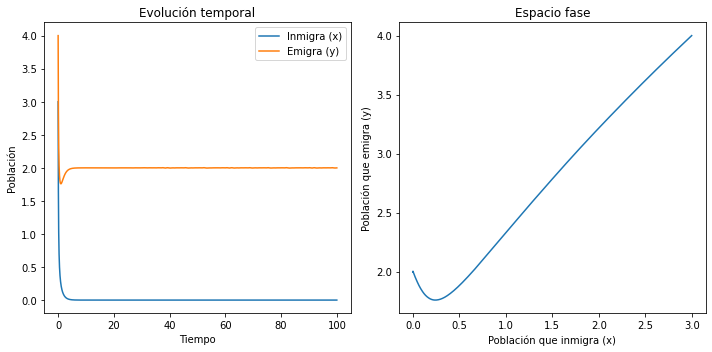

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición del sistema de ecuaciones
a = 2
b = 2 


def system(t, Y):
    x, y = Y
    dxdt = x*(1-a*x) - x*y
    dydt = y*(b-y) - x*y
    return [dxdt, dydt]

# Parámetros

# Intervalo de tiempo
t = np.linspace(0, 100, 50000)
init_cond = [3, 4]

# Solución del sistema
solution = solve_ivp(system, [t[0], t[-1]], init_cond, t_eval=t)

# Gráficos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[0], label="Inmigra (x)")
plt.plot(solution.t, solution.y[1], label="Emigra (y)")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.title("Evolución temporal")

plt.subplot(1, 2, 2)
plt.plot(solution.y[0], solution.y[1])
plt.xlabel("Población que inmigra (x)")
plt.ylabel("Población que emigra (y)")
plt.title("Espacio fase")


plt.tight_layout()
plt.show()



### Caso 2 h>0:

Los puntos criticos satisfacen $\dot{x} = 0$ $\wedge$ $\dot{y}=0$. Entonces 

\begin{align}
0 &=   x\,(1-a\,x) - xy  \,\,\,\,\,\,\,\,\,\,\,\,   (25) \\
0 &= y\, (b-y) - xy + h \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   (26)
\end{align}

Lo anterior puede realizarse usando SymPy. A continuación se muestra el código. 

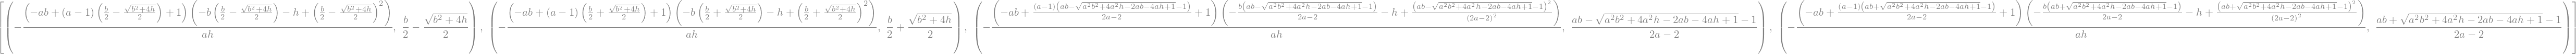

In [133]:
# Define las variables simbólicas
x, y, a, b, h = symbols('x y a b h')

# Define las ecuaciones
ecuacion1 = Eq( x*(1-a*x) - x*y, 0)
ecuacion2 = Eq( y*(b-y) - x*y + h, 0)

# Resuelve el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (x, y))

# Imprime las soluciones en formato LaTeX
solucion

**Observación:** Analizar la naturaleza de los cuatro puntos de equilibrio no resulta cómodo algebraicamente. Sin embargo, note que el factor que aparece en la coordenada $x$ en el primer y segundo punto es siempre cero.

$$-b\left( \dfrac{b}{2} - \dfrac{\sqrt{b^2 + 4h}}{2}  \right) - h + \left( \dfrac{b}{2} - \dfrac{\sqrt{b^2 + 4h}}{2}   \right)^2 = 0$$

Además el primer punto no es considerado porque la segunda coordenada es negativa. El segundo punto crítico viene dado por 

$$P_2 = \left( 0, \dfrac{b}{2} + \dfrac{\sqrt{b^2 + 4h}}{2} \right)$$

y es un punto cuya segunda coordenada es positiva, entonces es un punto de interés. Para el tercer y cuarto punto resulta importante estudiar el signo que toma la expresión dentro de las raices:

$$f(a,b) = a^2 b^2 + 4 a^ 2 h −2 a b − 4a h+1 = (ab-1)^2 + 4ah(a-1).$$

Por lo tanto, si $4ah(a-1)\geq 0$ $\wedge$ $a\neq 1$, es decir $a>1$, entonces existe $P_3$ y $P_4$ como puntos de equilibrio. 


El siguiente código tiene por objetivo estudiar el signo que toma la expresión $f(a,b) = a^2 b^2 + 8 a^ 2−2 a b − 8a+1$ como una restricción para los puntos de equilibrio. En este caso $h=2$.

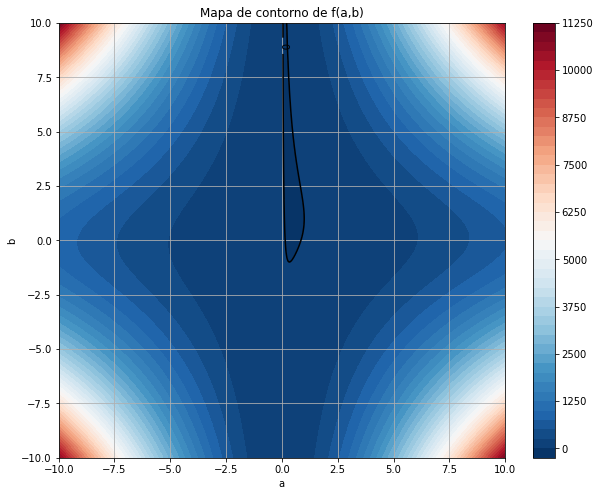

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función
def f(a, b):
    return a**2*b**2 + 8*a**2 - 2*a*b - 8*a + 1
# Crea una malla de valores para a y b
a = np.linspace(-10, 10, 400)
b = np.linspace(-10, 10, 400)
A, B = np.meshgrid(a, b)
Z = f(A, B)

# Crea el mapa de contorno
plt.figure(figsize=(10, 8))
contour = plt.contour(A, B, Z, levels=[0], colors='black')  # Contorno para f(a,b) = 0
plt.clabel(contour, inline=1, fontsize=10)
contour_filled = plt.contourf(A, B, Z, 50, cmap="RdBu_r")
plt.colorbar(contour_filled)
plt.title("Mapa de contorno de f(a,b)")
plt.xlabel("a")
plt.ylabel("b")
plt.grid(True)
plt.show()

El gráfico anterior muestra que $f(a,b) = a^2 b^2 + 8 a^ 2−2 a b − 8a+1 \geq 0$ para cualquier $a>1$ y $b>0$. Por lo tanto, existen cuatro puntos de equilibrio en este caso. 

### Plano de fase para el sistema no linealizado
Se considera el caso $a=1$, $b = 1$ y $h=2$. El caso $a=1$ permite descartar el tercer y cuarto punto de equilibrio calculado anteriormente.

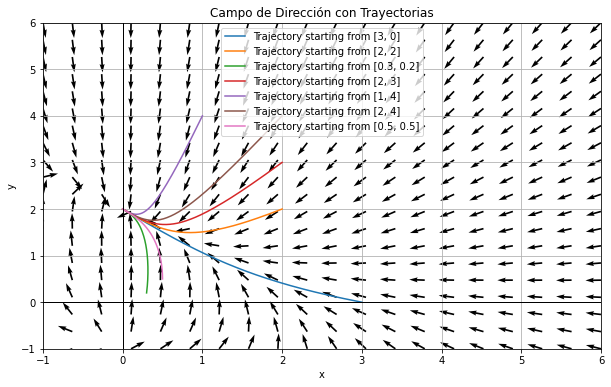

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 1
b = 1
h = 2

# Sistema de ecuaciones diferenciales
def system(t, Y):
    x, y = Y
    dxdt = x*(1-a*x) - x*y
    dydt = y*(b-y) - x*y + h
    return [dxdt, dydt]

# Campo de dirección
x = np.linspace(-1, 6, 20)
y = np.linspace(-1, 6, 20)

X, Y = np.meshgrid(x, y)
U = X*(1-a*X) - X*Y
V = Y*(b-Y) - X*Y + h

# Normalizar flechas
N = np.sqrt(U**2 + V**2)
U /= N
V /= N


plt.figure(figsize=(10, 6))

plt.quiver(X, Y, U, V)

# Lista de condiciones iniciales
initial_conditions_list = [[3, 0], [2, 2], [0.3, 0.2], [2, 3], [1, 4], [2,4], [1/2, 1/2]]

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, [0, 10], init_cond, t_eval=np.linspace(0, 10, 1000))
    plt.plot(sol.y[0], sol.y[1], label=f'Trajectory starting from {init_cond}')

# Puntos de equilibrio
#plt.scatter(0, 0, color='red', marker='o', label='Punto (0,0)')
#plt.scatter(0, 2, color='red', marker='o', label='Punto (0,2)')
#plt.scatter(1/2, 0, color='red', marker='o', label='Punto (1/2,0)')
#plt.scatter(-1, 3, color='red', marker='o', label='Punto (-1,3)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Dirección con Trayectorias')
plt.xlim([-1, 6])
plt.ylim([-1, 6])
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend(loc='best')

plt.show()



El gráfico anterior muestra que existe un punto de equilibrio en el primer cuadrante. Este punto se caracteriza porque la población de inmigración tienda a cero. 

Para el caso $a=1$, $b=1$ y $h=2$ el punto de equilibrio es $(0,2)$. El siguiente bloque de código justifica lo anterior.

In [141]:
# Define las variables simbólicas
x, y = symbols('x y')

# Define las ecuaciones
ecuacion1 = Eq( x*(1-1*x) - x*y, 0)
ecuacion2 = Eq( y*(1-y) - x*y + 2, 0)

# Resuelve el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (x, y))

# Imprime las soluciones en formato LaTeX
solucion

## Cálculo y clasificación de Puntos Críticos o Soluciones de Equilibrio

A continuación, se demuestra que el punto 
$$P_2 = \left(0,\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} \right)$$

es un punto estable.

 La parte derecha de (25)-(26) define la función $f:\mathbb{R}^2 \longrightarrow \mathbb{R}^2$, con $f(x,y) = (x\,(1-a\,x) - xy , y\, (b-y) - xy +h )$. Note que:

$$Df(x,y) = \left[
\begin{array}{cc}
1-2\,a\,x - y & -x \\
-y & b - 2\, y - x  \\
\end{array}
\right]  \,\,\,\,\,\,\,\,\,\,\,\,   (27)$$

<br> 
Sea $(x(t)+y(t)) = P_2 + (v(t), w(t))$, una solución del sistema cercana al punto de equilibrio $P_2$.  reemplazando $(x(t)+y(t)) = P_2 + (v(t), w(t))$ en el sistema (25)-(26) y linealizando se tiene que:

<br>

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
1 - \left(\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} \right) & 0 \\
-\left(\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} \right) & b - 2\, \left(\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} \right)   \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (28)
$$

<br>

Los valores propios de la matriz asociada al sistema (28) son:

$$\lambda_1 = 1 - \left(\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} \right)  $$

$$\lambda_2 = b - 2\, \left(\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} \right) = - \sqrt{b^2+4h} <0 $$

Si $h>0$, entonces $\dfrac{b}{2} + \dfrac{\sqrt{b^2+4h}}{2} > \dfrac{b + \sqrt{b^2}}{2} = \dfrac{2b}{2} =1 $. Por lo tanto, $\lambda_1 <0$. Así se demuestra que el punto $P_2$ es un punto estable. 



### Caso 3 h<0:

Motivado por lo hecho anteriormente, el análisis es análogo bajo el supuesto $b^2 + 4h \geq 0$. A continuación presentamos un ejemplo donde ocurre la condición anterior.

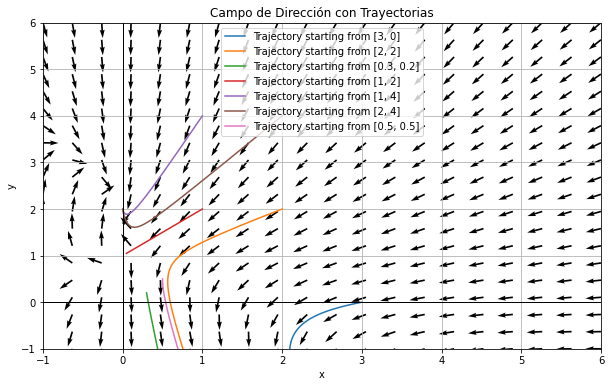

In [144]:
#caso b^2 + 4h > 0

a = 1
b = 3
h = -2

# Sistema de ecuaciones diferenciales
def system(t, Y):
    x, y = Y
    dxdt = x*(1-a*x) - x*y
    dydt = y*(b-y) - x*y + h
    return [dxdt, dydt]

# Campo de dirección
x = np.linspace(-1, 6, 20)
y = np.linspace(-1, 6, 20)

X, Y = np.meshgrid(x, y)
U = X*(1-a*X) - X*Y
V = Y*(b-Y) - X*Y + h

# Normalizar flechas
N = np.sqrt(U**2 + V**2)
U /= N
V /= N


plt.figure(figsize=(10, 6))

plt.quiver(X, Y, U, V)

# Lista de condiciones iniciales
initial_conditions_list = [[3, 0], [2, 2], [0.3, 0.2], [1, 2], [1, 4], [2,4], [1/2, 1/2]]

for init_cond in initial_conditions_list:
    sol = solve_ivp(system, [0, 10], init_cond, t_eval=np.linspace(0, 10, 1000))
    plt.plot(sol.y[0], sol.y[1], label=f'Trajectory starting from {init_cond}')

# Puntos de equilibrio
#plt.scatter(0, 0, color='red', marker='o', label='Punto (0,0)')
#plt.scatter(0, 2, color='red', marker='o', label='Punto (0,2)')
#plt.scatter(1/2, 0, color='red', marker='o', label='Punto (1/2,0)')
#plt.scatter(-1, 3, color='red', marker='o', label='Punto (-1,3)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Dirección con Trayectorias')
plt.xlim([-1, 6])
plt.ylim([-1, 6])
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend(loc='best')

plt.show()

**Observación:** El gráfico anterior muestra que sigue existiendo un punto estable en $P_2$. Sin embargo aparece el punto $P_1$ como un nuevo punto de interés. En este caso, $P_1=(0,1)$ parece ser un punto silla, donde en general:

$$P_1 = \left(0,\dfrac{b}{2} - \dfrac{\sqrt{b^2+4h}}{2} \right)$$

## Casificación de Puntos Críticos  $P_1$ 

Sea $(x(t)+y(t)) = P_1 + (v(t), w(t))$, una solución del sistema cercana al punto de equilibrio $P_1$.  reemplazando $(x(t)+y(t)) = P_1 + (v(t), w(t))$ en el sistema (25)-(26) y linealizando se tiene que:

<br>

$$\left[
\begin{array}{c}
\dot{v} \\
\dot{w} \\
\end{array}
\right] = \left[
\begin{array}{cc}
1 - \left(\dfrac{b}{2} - \dfrac{\sqrt{b^2+4h}}{2} \right) & 0 \\
-\left(\dfrac{b}{2} - \dfrac{\sqrt{b^2+4h}}{2} \right) & b - 2\, \left(\dfrac{b}{2} - \dfrac{\sqrt{b^2+4h}}{2} \right)   \\
\end{array}
\right]\left[
\begin{array}{c}
v  \\
w  \\
\end{array}
\right] \,\,\,\,\,\,\,\,\,\,\,\,  (29)
$$

<br>

Los valores propios de la matriz asociada al sistema (29) son:

$$\lambda_1 = 1 - \left(\dfrac{b}{2} - \dfrac{\sqrt{b^2+4h}}{2} \right)  $$

$$\lambda_2 = b - 2\, \left(\dfrac{b}{2} - \dfrac{\sqrt{b^2+4h}}{2} \right) =  \sqrt{b^2+4h} > 0 $$

Independiente del signo que tome $\lambda_1$, el punto $P_1$ no es un punto estable porque $\lambda_2 >0$. 



### Referencias bibliográficas

[1] BLANCHARD, P.; DEVANEY, R.L.; HALL, G.R. Ecuaciones Diferenciales, International Thomson Editores, S.A. de C.V., (1999).